In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('gpsdata.xlsx')

In [4]:
df.tDateTime = pd.to_datetime(df.tDateTime, utc=True).dt.tz_convert('Asia/Taipei')
df.head()

,Reference,ItemNameType,StationID,UserName,SerialNumber,ProductName,Version,Item20,Item20St,Item42,Item42St,tDateTime,SO,Job_GPN,ClassCode
0,66,15686,1,21580,3422062083,MARQ GEN2 V09.10,9.1,1.990000,1,0.0,2,2022-07-20 10:23:57+08:00,15937190,011-05817-01,RD-E_E
1,66,15686,2,21580,3422062106,MARQ GEN2 V09.10,9.1,1.780001,1,0.0,2,2022-07-20 10:23:57+08:00,15937190,011-05817-01,RD-E_E
2,66,15686,3,21580,3422062103,MARQ GEN2 V09.10,9.1,1.610000,1,0.0,2,2022-07-20 10:24:02+08:00,15937190,011-05817-01,RD-E_E
3,66,15686,2,21580,3422062092,MARQ GEN2 V09.10,9.1,1.640001,1,0.0,2,2022-07-20 10:27:29+08:00,15937190,011-05817-01,RD-E_E
4,66,15686,3,21580,3422062101,MARQ GEN2 V09.10,9.1,1.810000,1,0.0,2,2022-07-20 10:27:41+08:00,15937190,011-05817-01,RD-E_E


ct_L1 byRef (not only pass)

In [5]:
ct_L1_np = df.loc[(df.ItemNameType==15686)&(df.ProductName!='MarQ2_CT'),['SerialNumber','Item20','Item20St','StationID','tDateTime','UserName']]
ct_L1_np.head()

,SerialNumber,Item20,Item20St,StationID,tDateTime,UserName
0,3422062083,1.990000,1,1,2022-07-20 10:23:57+08:00,21580
1,3422062106,1.780001,1,2,2022-07-20 10:23:57+08:00,21580
2,3422062103,1.610000,1,3,2022-07-20 10:24:02+08:00,21580
3,3422062092,1.640001,1,2,2022-07-20 10:27:29+08:00,21580
4,3422062101,1.810000,1,3,2022-07-20 10:27:41+08:00,21580


In [6]:
ct_L1_np_d = ct_L1_np[ct_L1_np.duplicated(subset='SerialNumber', keep=False)].sort_values(['SerialNumber','tDateTime'])

ct_L1 byRef

In [7]:
ct_L1 = df.loc[(df.ItemNameType==15686) & (df.Item20St.isin([0,1])),['Item20','StationID','tDateTime']]
ct_L1.head()

,Item20,StationID,tDateTime
0,1.990000,1,2022-07-20 10:23:57+08:00
1,1.780001,2,2022-07-20 10:23:57+08:00
2,1.610000,3,2022-07-20 10:24:02+08:00
3,1.640001,2,2022-07-20 10:27:29+08:00
4,1.810000,3,2022-07-20 10:27:41+08:00


In [8]:
ct_L1.set_index('tDateTime',inplace=True)

In [9]:
ct_L1 = ct_L1[ct_L1.index<'2022-07-24']

In [10]:
ct_L1_groupby = ct_L1.groupby('StationID').resample('30min').median()['Item20'].unstack('StationID')
ct_L1_groupby.index = ct_L1_groupby.index.strftime('%m-%d %H:%M')

Text(0.5, 1.0, 'CT_GPS_L1_byRef')

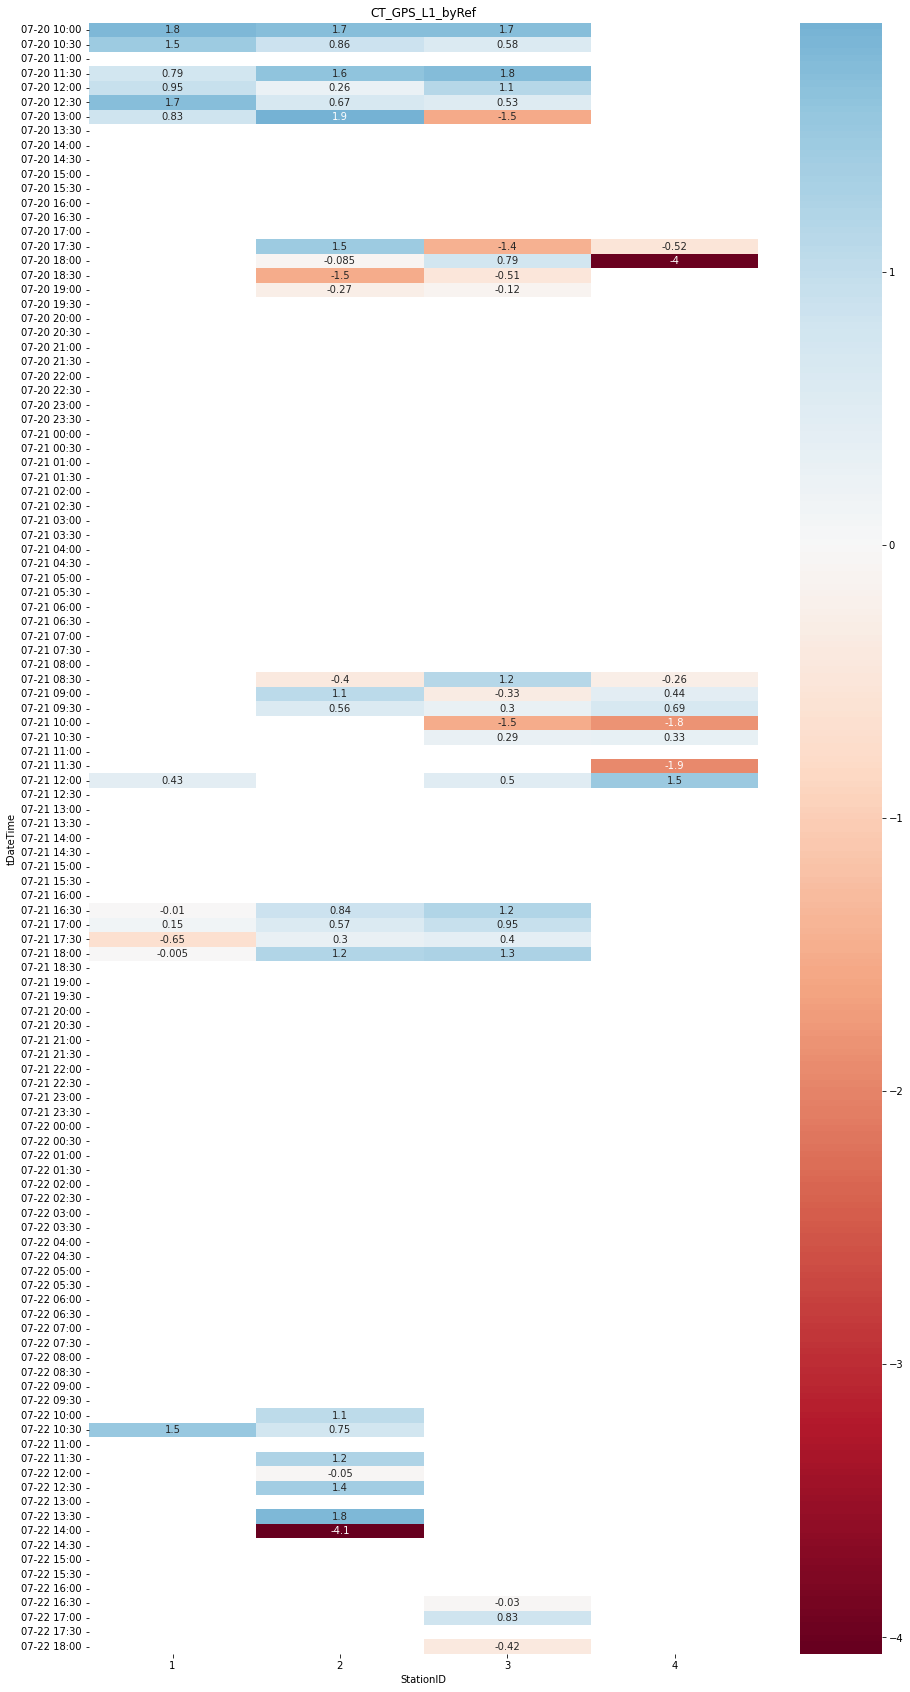

In [35]:
testitem = 'CT_GPS_L1_byRef'
plt.figure(figsize=(15,30))
sns.heatmap(ct_L1_groupby,center=0,cmap="RdBu",annot=True)
plt.title(testitem)
#plt.savefig(testitem, bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)

ft_L1

In [12]:
ft_L1 = df.loc[(df.ItemNameType==15688) & (df.Item20St.isin([0,1])),['Item20','StationID','tDateTime']]
ft_L1.set_index('tDateTime',inplace=True)
ft_L1.head()

,Item20,StationID
tDateTime,,
2022-07-21 12:59:02+08:00,-1.240000,3
2022-07-21 12:59:51+08:00,1.670000,2
2022-07-21 13:03:42+08:00,1.450000,3
2022-07-21 13:04:38+08:00,-1.199999,4
2022-07-21 13:09:18+08:00,-0.819999,4


In [13]:
ft_L1 = ft_L1[ft_L1.index<'2022-07-24']

In [14]:
ft_L1_groupby = ft_L1.groupby('StationID').resample('30min').median()['Item20'].unstack('StationID')
ft_L1_groupby.index = ft_L1_groupby.index.strftime('%m-%d %H:%M')

Text(0.5, 1.0, 'FT_GPS_L1_byRef')

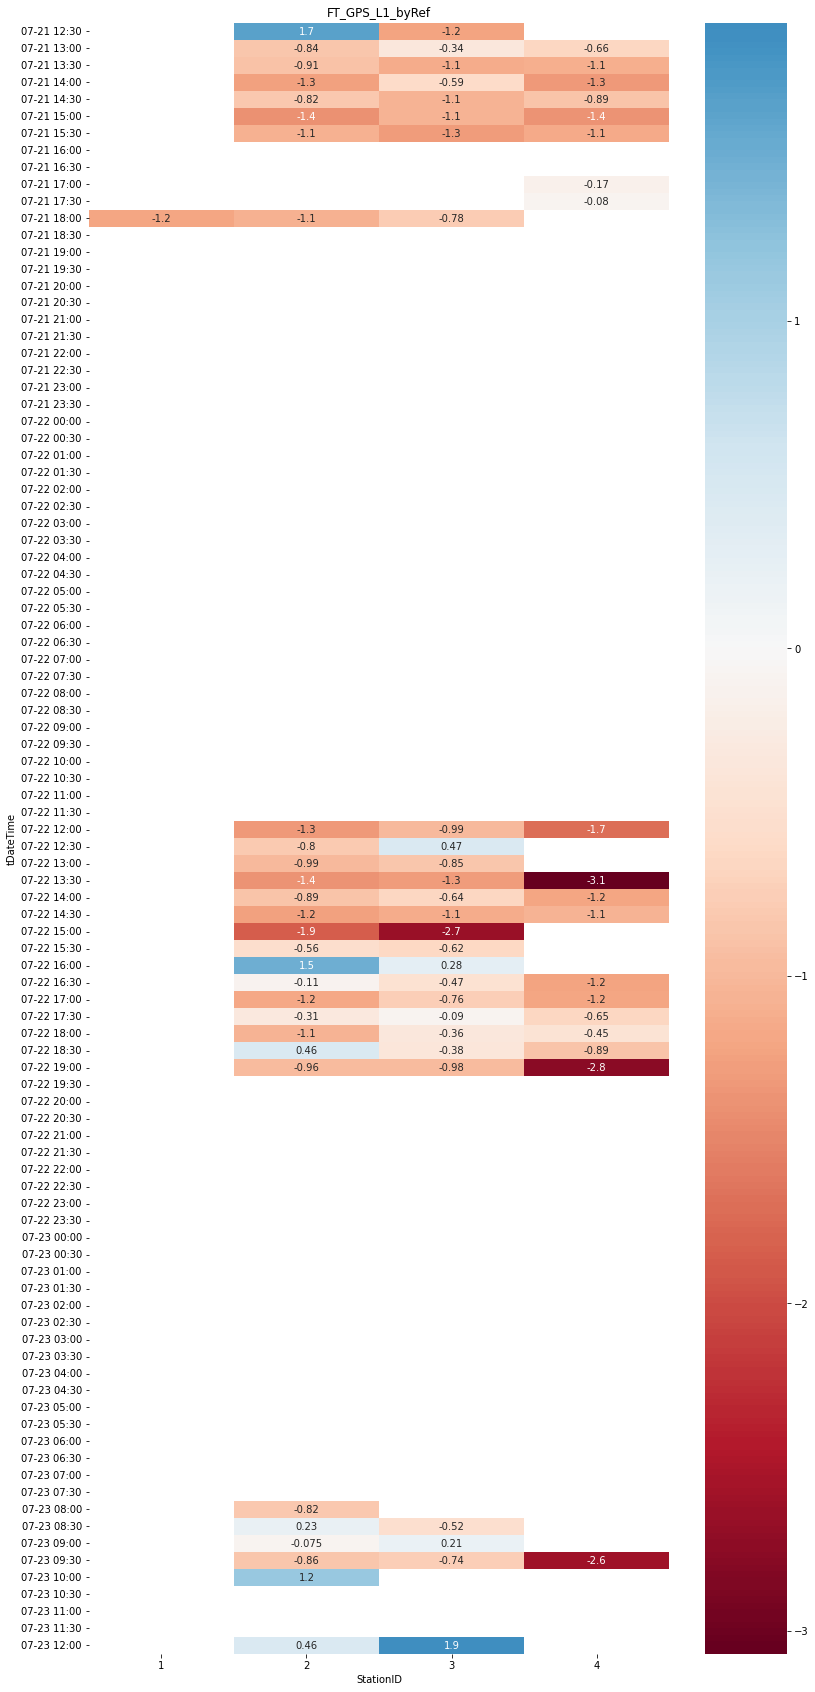

In [34]:
testitem2 = 'FT_GPS_L1_byRef'
plt.figure(figsize=(13,30))
sns.heatmap(ft_L1_groupby,center=0,cmap="RdBu",annot=True)
plt.title(testitem2)
#plt.savefig(testitem2, bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)

HT L5

In [25]:
ht_L5 = df.loc[(df.ItemNameType == 15687) & (df.Item42St.isin([0,1])),['Item42','StationID','tDateTime']].set_index('tDateTime')
ht_L5.head()

,Item42,StationID
tDateTime,,
2022-07-20 14:07:05+08:00,-0.99,4
2022-07-20 14:09:04+08:00,-4.12,3
2022-07-20 14:10:44+08:00,-1.74,4
2022-07-20 14:39:18+08:00,-0.82,4
2022-07-20 14:39:47+08:00,-1.41,1


In [30]:
ht_L5 = ht_L5[ht_L5.index<'2022-07-22']

In [31]:
ht_L5_groupby = ht_L5.groupby('StationID').resample('30min').median()['Item42'].unstack('StationID')

Text(0.5, 1.0, 'HT_GPS_L5_byRef')

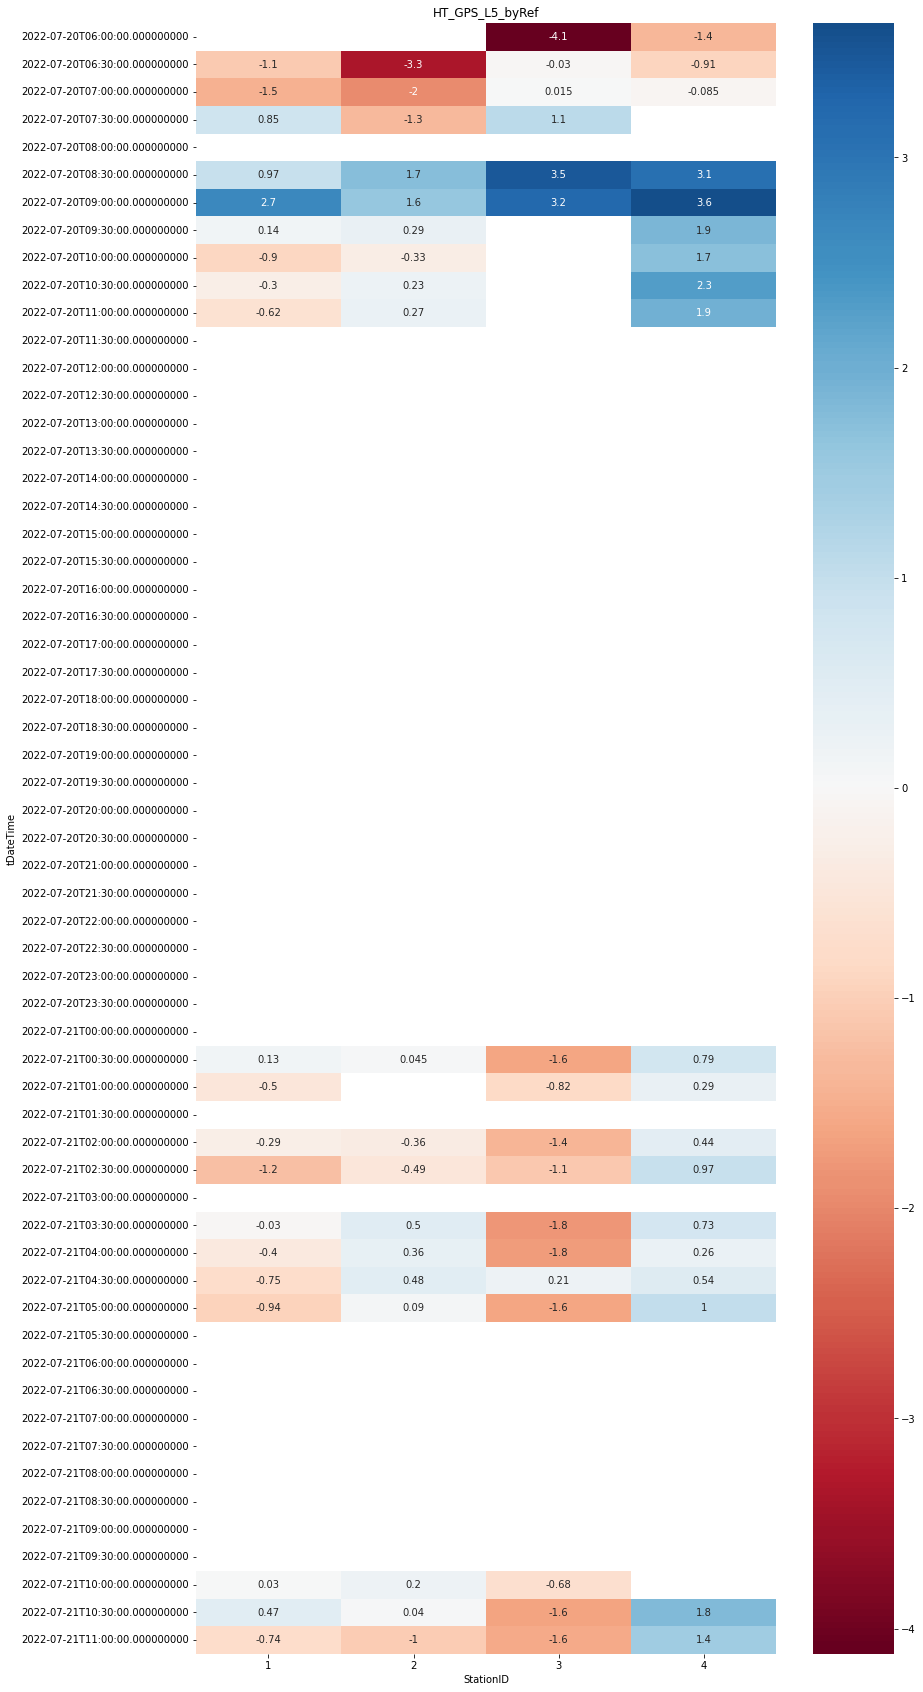

In [33]:
testitem3 = 'HT_GPS_L5_byRef'
plt.figure(figsize=(13,30))
sns.heatmap(ht_L5_groupby,center=0,cmap="RdBu",annot=True)
plt.title(testitem3)
#plt.savefig(testitem3, bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)